In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use("dark_background")

In [2]:
import torch
import numpy as np
import networkx as nx
import os

In [3]:
results_dir = "../results/2021-08-31_09-22_dist_dense_v2"

results1 = torch.load(os.path.join(results_dir, "cadmm_results.pt"), map_location=torch.device("cpu"))
#results2 = torch.load(os.path.join(results_dir, "dsgt_results.pt"), map_location=torch.device("cpu"))
# results3 = torch.load(os.path.join(results_dir, "rho_01_results.pt"), map_location=torch.device("cpu"))
#results_solo = torch.load(os.path.join(results_dir, "solo_results.pt"), map_location=torch.device("cpu"))


# Communication Graph

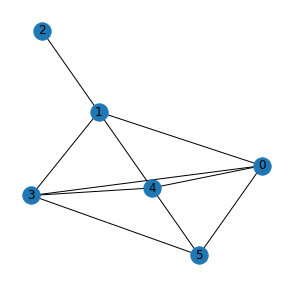

In [4]:
G = nx.read_gpickle(os.path.join(results_dir, "graph.gpickle"))

(fig, ax) = plt.subplots(figsize=(5, 5))
nx.draw_kamada_kawai(G, with_labels=True)

# Validation loss

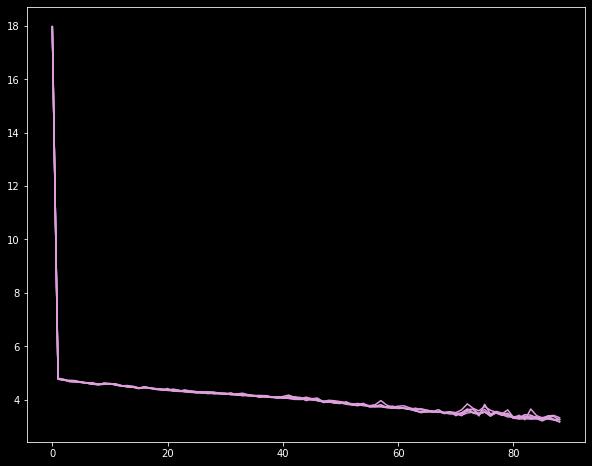

In [5]:
vl1 = torch.stack(results1["validation_loss"])
#vl2 = torch.stack(results2["validation_loss"])
#vl3 = torch.stack(results3["validation_loss"])

(fig, ax) = plt.subplots(figsize=(10, 8))

t = np.arange(vl1.shape[0])

#for i in results_solo.keys():
#    ax.plot(t, results_solo[i]["validation_loss"] * np.ones_like(t), color="gray")

ax.plot(vl1, color="plum")
#ax.plot(vl2, color="limegreen")
#ax.plot(vl3, color="royalblue")
#ax.set_yscale("log")

# Density Plots

In [6]:
dens1 = results1["mesh_grid_density"]
#dens2 = results2["mesh_grid_density"]
locs = results1["mesh_inputs"]

N = G.number_of_nodes()
(fig, axs) = plt.subplots(nrows=2, ncols=N, figsize=(20, 7))

for i in range(N):
    pred1 = (torch.squeeze(dens1[-1]))[i, :]
    axs[0, i].tricontourf(locs[:, 0], locs[:, 1], pred1)
    axs[0, i].set_title("Node {}, Solo".format(i))
    #pred2 = (torch.squeeze(dens2[-1]))[i, :]
    #axs[1, i].tricontourf(locs[:, 0], locs[:, 1], pred2)
    #axs[1, i].set_title("Node {}, CADMM".format(i))


NameError: name 'results2' is not defined

# Denisty Animation

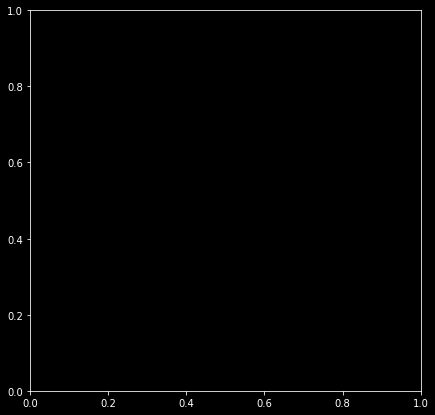

In [37]:
dens1 = results2["mesh_grid_density"]
locs = results2["mesh_inputs"]

num_frames = len(dens1)
agent = 3

(fig, ax) = plt.subplots(figsize=(7, 7))

def animate(i):
    global cont
    z = (torch.squeeze(dens1[i]))[agent, :]
    ax.tricontourf(locs[:, 0], locs[:, 1], z)
    ax.set_title("frame = {}".format(i))

#anim = animation.FuncAnimation(fig, animate, frames=num_frames, repeat=True)
#anim.save("density_animation.mp4")